In [150]:
import pandas as pd
import numpy as np
import math

In [151]:
loans = pd.read_csv('lending-club-data.csv')

/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda u: -1 if u else +1)
loans.drop(['bad_loans'], axis=1, inplace=True)

In [153]:
features = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]
target = 'safe_loans'

In [154]:
loans = loans[features + [target]]

In [155]:
loans.fillna({'emp_length': 'N/A'}, inplace=True)

In [156]:
train_idx = pd.read_json('module-8-assignment-2-train-idx.json')[0]
test_idx = pd.read_json('module-8-assignment-2-test-idx.json')[0]

In [157]:
def one_hot_encoding(dataset, column, remove_categorical_column=False, inplace=False):
    result_dataset = dataset if inplace else dataset.copy()
    
    if column not in dataset.columns:
        return result_dataset
    
    all_categories = ([u for u in set(dataset[column].values)])
    all_categories.sort()
    
    for category in all_categories:
        new_name = "%s.%s" % (column, category)
        result_dataset[new_name] = (result_dataset[column] == category).apply(lambda u: 1 if u else 0)
    
    if remove_categorical_column:
        result_dataset = result_dataset.drop([column], axis=1, errors='ignore')
    
    return result_dataset

In [158]:
def one_hot_encoding_multiple_cols(dataset, columns, remove_categorical_column=False, inplace=False):
    result_dataset = dataset if inplace else dataset.copy()
    
    for column in columns:
        result_dataset = one_hot_encoding(result_dataset, column, remove_categorical_column=False, inplace=True)
    
    if remove_categorical_column:
        print (remove_categorical_column, len(result_dataset.columns))
        result_dataset.drop(columns, axis=1, inplace=True, errors='ignore')
        print (len(result_dataset.columns))
    
    # Since result_dataset lost reference to dataset, we need to assign new reference.
    if inplace: 
        dataset = result_dataset
        
    return result_dataset

In [159]:
one_hot_encoding_multiple_cols(loans, features, remove_categorical_column=True,
                              inplace=True)

True 30
26


,safe_loans,grade.A,grade.B,grade.C,grade.D,grade.E,grade.F,grade.G,term. 36 months,term. 60 months,...,emp_length.2 years,emp_length.3 years,emp_length.4 years,emp_length.5 years,emp_length.6 years,emp_length.7 years,emp_length.8 years,emp_length.9 years,emp_length.< 1 year,emp_length.N/A
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,-1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7,-1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
loans.head()

,safe_loans,grade.A,grade.B,grade.C,grade.D,grade.E,grade.F,grade.G,term. 36 months,term. 60 months,...,emp_length.2 years,emp_length.3 years,emp_length.4 years,emp_length.5 years,emp_length.6 years,emp_length.7 years,emp_length.8 years,emp_length.9 years,emp_length.< 1 year,emp_length.N/A
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [161]:
train_data = loans.iloc[train_idx]
test_data = loans.iloc[test_idx]

### Weighted decision trees

In [162]:
def intermediate_node_weighted_mistakes(labels_in_node, data_weights):
    # Sum the weights of all entries with label +1
    total_weight_positive = sum(data_weights[labels_in_node == +1])
    
    # Weight of mistakes for predicting all -1's is equal to the sum above
    ### YOUR CODE HERE
    weighted_mistakes_all_negative = total_weight_positive
    
    # Sum the weights of all entries with label -1
    ### YOUR CODE HERE
    total_weight_negative = sum(data_weights[labels_in_node == -1])
    
    # Weight of mistakes for predicting all +1's is equal to the sum above
    ### YOUR CODE HERE
    weighted_mistakes_all_positive = total_weight_negative
    
    # Return the tuple (weight, class_label) representing the lower of the two weights
    #    class_label should be an integer of value +1 or -1.
    # If the two weights are identical, return (weighted_mistakes_all_positive,+1)
    ### YOUR CODE HERE
    (lower_weighted_mistakes, label) = (weighted_mistakes_all_positive, +1) \
    if (weighted_mistakes_all_positive <= weighted_mistakes_all_negative) else \
    (weighted_mistakes_all_negative, -1)
    
    return (lower_weighted_mistakes, label)

### Quiz Question: If we set the weights α=1 for all data points, how is the weight of mistakes WM(α,y^) related to the classification error?

EQUALS



### Function to pick best feature to split on



In [163]:
# If the data is identical in each feature, this function should return None

def best_splitting_feature(data, features, target, data_weights):
    
    # These variables will keep track of the best feature and the corresponding error
    best_feature = None
    best_error = float('+inf') 
    num_points = float(len(data))

    # Loop through each feature to consider splitting on that feature
    for feature in features:
        
        # The left split will have all data points where the feature value is 0
        # The right split will have all data points where the feature value is 1
        left_split = data[data[feature] == 0]
        right_split = data[data[feature] == 1]
        
        # Apply the same filtering to data_weights to create left_data_weights, right_data_weights
        ## YOUR CODE HERE
        left_data_weights = data_weights[data[feature] == 0]
        right_data_weights = data_weights[data[feature] == 1]
                    
        # DIFFERENT HERE
        # Calculate the weight of mistakes for left and right sides
        ## YOUR CODE HERE
        left_weighted_mistakes, left_class = intermediate_node_weighted_mistakes(left_split[target], left_data_weights)
        right_weighted_mistakes, right_class = intermediate_node_weighted_mistakes(right_split[target], right_data_weights)
        
        # DIFFERENT HERE
        # Compute weighted error by computing
        #  ( [weight of mistakes (left)] + [weight of mistakes (right)] ) / [total weight of all data points]
        ## YOUR CODE HERE
        error = (left_weighted_mistakes + right_weighted_mistakes) / sum(data_weights)
        
        # If this is the best error we have found so far, store the feature and the error
        if error < best_error:
            best_feature = feature
            best_error = error
    
    # Return the best feature we found
    return best_feature

### Building the tree

In [164]:
def create_leaf(target_values, data_weights):
    
    # Create a leaf node
    leaf = {'splitting_feature' : None,
            'is_leaf': True}
    
    # Computed weight of mistakes.
    # Store the predicted class (1 or -1) in leaf['prediction']
    weighted_error, best_class = intermediate_node_weighted_mistakes(
        target_values, data_weights)
    
    leaf['prediction'] =  best_class
    
    return leaf

In [165]:
def weighted_decision_tree_create(data, features, target, data_weights, current_depth = 1, max_depth = 10):
    remaining_features = features[:] # Make a copy of the features.
    target_values = data[target]
    print ("--------------------------------------------------------------------")
    print ("Subtree, depth = %s (%s data points)." % (current_depth, len(target_values)))
    
    # Stopping condition 1. Error is 0.
    if intermediate_node_weighted_mistakes(target_values, data_weights)[0] <= 1e-15:
        print ("Stopping condition 1 reached.")
        return create_leaf(target_values, data_weights)
    
    # Stopping condition 2. No more features.
    if remaining_features == []:
        print ("Stopping condition 2 reached.")
        return create_leaf(target_values, data_weights)    
    
    # Additional stopping condition (limit tree depth)
    if current_depth > max_depth:
        print ("Reached maximum depth. Stopping for now.")
        return create_leaf(target_values, data_weights)
    
    # If all the datapoints are the same, splitting_feature will be None. Create a leaf
    splitting_feature = best_splitting_feature(data, features, target, data_weights)
    remaining_features.remove(splitting_feature)
        
    left_split = data[data[splitting_feature] == 0]
    right_split = data[data[splitting_feature] == 1]
    
    left_data_weights = data_weights[data[splitting_feature] == 0]
    right_data_weights = data_weights[data[splitting_feature] == 1]
    
    print ("Split on feature %s. (%s, %s)" % (\
              splitting_feature, len(left_split), len(right_split)))
    
    # Create a leaf node if the split is "perfect"
    if len(left_split) == len(data):
        print ("Creating leaf node.")
        return create_leaf(left_split[target], data_weights)
    if len(right_split) == len(data):
        print ("Creating leaf node.")
        return create_leaf(right_split[target], data_weights)
    
    # Repeat (recurse) on left and right subtrees
    left_tree = weighted_decision_tree_create(
        left_split, remaining_features, target, left_data_weights, current_depth + 1, max_depth)
    right_tree = weighted_decision_tree_create(
        right_split, remaining_features, target, right_data_weights, current_depth + 1, max_depth)
    
    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

In [166]:
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

### Making predictions with a weighted decision tree


In [167]:
def classify(tree, x, annotate = False):   
    # If the node is a leaf node.
    if tree['is_leaf']:
        if annotate: 
            print ("At leaf, predicting %s" % tree['prediction'])
        return tree['prediction'] 
    else:
        # Split on feature.
        split_feature_value = x[tree['splitting_feature']]
        if annotate: 
            print ("Split on %s = %s" % (tree['splitting_feature'], split_feature_value))
        if split_feature_value == 0:
            return classify(tree['left'], x, annotate)
        else:
            return classify(tree['right'], x, annotate)

In [168]:
def evaluate_classification_error(tree, data):
    # Apply the classify(tree, x) to each row in your data
    prediction = data.apply(lambda x: classify(tree, x), axis=1)
    
    # Once you've made the predictions, calculate the classification error
    return (prediction != data[target]).sum() / float(len(data))

### Example: Training a weighted decision tree


In [169]:
example_data_weights = np.array([1.] * 10 + (len(train_data) - 20) * [0] + [1.] * 10)

In [170]:
features_train = train_data.columns

In [171]:
features_train = list(features_train.drop('safe_loans', errors='ignore'))

In [172]:
features_train

['grade.A',
 'grade.B',
 'grade.C',
 'grade.D',
 'grade.E',
 'grade.F',
 'grade.G',
 'term. 36 months',
 'term. 60 months',
 'home_ownership.MORTGAGE',
 'home_ownership.OTHER',
 'home_ownership.OWN',
 'home_ownership.RENT',
 'emp_length.1 year',
 'emp_length.10+ years',
 'emp_length.2 years',
 'emp_length.3 years',
 'emp_length.4 years',
 'emp_length.5 years',
 'emp_length.6 years',
 'emp_length.7 years',
 'emp_length.8 years',
 'emp_length.9 years',
 'emp_length.< 1 year',
 'emp_length.N/A']

In [173]:
small_data_decision_tree_subset_20 = weighted_decision_tree_create(train_data,
                                                                   features_train, 
                                                                   target,
                                                                   example_data_weights,
                                                                   max_depth=2
                                                                  )

--------------------------------------------------------------------
Subtree, depth = 1 (37224 data points).
Split on feature home_ownership.RENT. (20514, 16710)
--------------------------------------------------------------------
Subtree, depth = 2 (20514 data points).
Split on feature grade.F. (19613, 901)
--------------------------------------------------------------------
Subtree, depth = 3 (19613 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (901 data points).
Stopping condition 1 reached.
--------------------------------------------------------------------
Subtree, depth = 2 (16710 data points).
Split on feature grade.D. (13315, 3395)
--------------------------------------------------------------------
Subtree, depth = 3 (13315 data points).
Stopping condition 1 reached.
--------------------------------------------------------------------
Subtree, depth = 3 (3395 data points).
Stoppin

### Quiz Question: Will you get the same model as small_data_decision_tree_subset_20 if you trained a decision tree with only the 20 data points with non-zero weights from the set of points in subset_20?



yes

In [174]:
full_data_tree_model = weighted_decision_tree_create(train_data, features_train, target,
                                                     np.array([1.] * len(train_data)),
                                                     max_depth=2
                                                    )

--------------------------------------------------------------------
Subtree, depth = 1 (37224 data points).
Split on feature term. 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 2 (9223 data points).
Split on feature grade.A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 3 (9122 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (101 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (28001 data points).
Split on feature grade.D. (23300, 4701)
--------------------------------------------------------------------
Subtree, depth = 3 (23300 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (4701 data po

In [175]:
evaluate_classification_error(full_data_tree_model, train_data)

0.40003761014399314

### Implementing your own Adaboost (on decision stumps)


In [220]:
from math import log
from math import exp

def adaboost_with_tree_stumps(data, features, target, num_tree_stumps, max_depth=1):
    # start with unweighted data
    alpha = np.array([1.]*len(data))
    weights = []
    tree_stumps = []
    target_values = data[target]
    
    for t in range(num_tree_stumps):
        print ('=====================================================')
        print ('Adaboost Iteration %d' % t)
        print ('=====================================================')
        
        # Learn a weighted decision tree stump. Use max_depth=1
        tree_stump = weighted_decision_tree_create(data, features, target,
                                                   data_weights=alpha, max_depth=max_depth)
        tree_stumps.append(tree_stump)
        
        # Make predictions
        predictions = data.apply(lambda x: classify(tree_stump, x), axis=1)
        
        # Produce a Boolean array indicating whether
        # each data point was correctly classified
        is_correct = predictions == target_values
        is_wrong   = predictions != target_values
        
        # Compute weighted error
        # YOUR CODE HERE
        weighted_error = sum(is_wrong * alpha) / sum(alpha)
        
        # Compute model coefficient using weighted error
        # YOUR CODE HERE
        weight = 0.5 * log((1. - weighted_error) / weighted_error)
        weights.append(weight)
        
        # Adjust weights on data point
        adjustment = is_correct.apply(lambda is_correct : exp(-weight) if is_correct else exp(weight))
        
        # Scale alpha by multiplying by adjustment
        # Then normalize data points weights
        ## YOUR CODE HERE 
        alpha = alpha * adjustment
        alpha /= sum(alpha)
    
    return weights, tree_stumps

In [221]:
def predict_adaboost(stump_weights, tree_stumps, data):
    scores = np.array([0.]*len(data))
    
    for i, tree_stump in enumerate(tree_stumps):
        predictions = data.apply(lambda x: classify(tree_stump, x), axis=1)
        
        # Accumulate predictions on scaores array
        # YOUR CODE HERE
        scores = scores + predictions * stump_weights[i]
        
    return scores.apply(lambda score : +1 if score > 0 else -1)

### Quiz Question: Are the weights monotonically decreasing, monotonically increasing, or neither?



### Reminder: Stump weights (w^) tell you how important each stump is while making predictions with the entire boosted ensemble.

## Performance plots

How does accuracy change with adding stumps to the ensemble?



In [200]:
features_train

['grade.A',
 'grade.B',
 'grade.C',
 'grade.D',
 'grade.E',
 'grade.F',
 'grade.G',
 'term. 36 months',
 'term. 60 months',
 'home_ownership.MORTGAGE',
 'home_ownership.OTHER',
 'home_ownership.OWN',
 'home_ownership.RENT',
 'emp_length.1 year',
 'emp_length.10+ years',
 'emp_length.2 years',
 'emp_length.3 years',
 'emp_length.4 years',
 'emp_length.5 years',
 'emp_length.6 years',
 'emp_length.7 years',
 'emp_length.8 years',
 'emp_length.9 years',
 'emp_length.< 1 year',
 'emp_length.N/A']

In [223]:
stump_weights, stump = adaboost_with_tree_stumps(train_data, features_train, target,
                                                 max_depth=2,
                                      num_tree_stumps=20)

Adaboost Iteration 0
--------------------------------------------------------------------
Subtree, depth = 1 (37224 data points).
Split on feature term. 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 2 (9223 data points).
Split on feature grade.A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 3 (9122 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (101 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (28001 data points).
Split on feature grade.D. (23300, 4701)
--------------------------------------------------------------------
Subtree, depth = 3 (23300 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, de

Split on feature grade.C. (27812, 9412)
--------------------------------------------------------------------
Subtree, depth = 2 (27812 data points).
Split on feature home_ownership.OWN. (25521, 2291)
--------------------------------------------------------------------
Subtree, depth = 3 (25521 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (2291 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (9412 data points).
Split on feature term. 36 months. (2190, 7222)
--------------------------------------------------------------------
Subtree, depth = 3 (2190 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (7222 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 8
---------------------------

Split on feature emp_length.4 years. (34593, 2631)
--------------------------------------------------------------------
Subtree, depth = 2 (34593 data points).
Split on feature grade.E. (31427, 3166)
--------------------------------------------------------------------
Subtree, depth = 3 (31427 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (3166 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 2 (2631 data points).
Split on feature grade.E. (2388, 243)
--------------------------------------------------------------------
Subtree, depth = 3 (2388 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 3 (243 data points).
Reached maximum depth. Stopping for now.
Adaboost Iteration 15
------------------------------------

In [224]:
ada_boost_prediction = predict_adaboost(stump_weights, stump, train_data)

In [225]:
ada_error = (ada_boost_prediction != train_data[target]).sum() * 1 / len(train_data)
ada_error

0.3773103374167204

### Computing training error at the end of each iteration

In [226]:
error_all = []
for n in range(1, 31 ):
    predictions = predict_adaboost(stump_weights[:n], stump[:n], train_data)
    error = (train_data[target] != predictions).sum() / len(train_data)
    error_all.append(error)
    print ("Iteration %s, training error = %s" % (n, error_all[n-1]))

Iteration 1, training error = 0.40003761014399314
Iteration 2, training error = 0.40003761014399314
Iteration 3, training error = 0.3849129593810445
Iteration 4, training error = 0.3889426176660219
Iteration 5, training error = 0.38614872125510424
Iteration 6, training error = 0.38614872125510424
Iteration 7, training error = 0.38198474102729424
Iteration 8, training error = 0.38198474102729424
Iteration 9, training error = 0.38023855577047067
Iteration 10, training error = 0.37919084461637653
Iteration 11, training error = 0.3784386417365141
Iteration 12, training error = 0.3784923705136471
Iteration 13, training error = 0.3786535568450462
Iteration 14, training error = 0.37790135396518376
Iteration 15, training error = 0.37790135396518376
Iteration 16, training error = 0.37790135396518376
Iteration 17, training error = 0.3778207607994842
Iteration 18, training error = 0.3778476251880507
Iteration 19, training error = 0.3779819471308833
Iteration 20, training error = 0.377310337416720

In [214]:
sorted(stump_weights, reverse=True) == stump_weights

False

In [209]:
from matplotlib import pyplot as plt

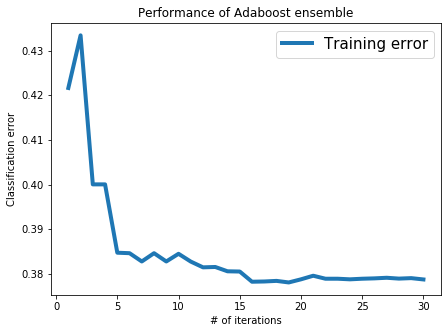

In [210]:
plt.rcParams['figure.figsize'] = 7, 5
plt.plot(range(1,31), error_all, '-', linewidth=4.0, label='Training error')
plt.title('Performance of Adaboost ensemble')
plt.xlabel('# of iterations')
plt.ylabel('Classification error')
plt.legend(loc='best', prop={'size':15})

plt.rcParams.update({'font.size': 16})

### Quiz Question: Which of the following best describes a general trend in accuracy as we add more and more components? Answer based on the 30 components learned so far.



Training error goes down in general, with some ups and downs in the middle.

## Evaluation on the test data


In [215]:
error_test_all = []
for n in range(1, 31):
    predictions = predict_adaboost(stump_weights[:n], stump[:n], test_data)
    error = (test_data[target] != predictions).sum() / len(test_data)
    error_test_all.append(error)
    print ("Iteration %s, training error = %s" % (n, error_test_all[n-1]))

Iteration 1, training error = 0.4233089185695821
Iteration 2, training error = 0.42847910383455406
Iteration 3, training error = 0.3981042654028436
Iteration 4, training error = 0.3981042654028436
Iteration 5, training error = 0.3799009047824214
Iteration 6, training error = 0.38000861697544164
Iteration 7, training error = 0.3792546316242999
Iteration 8, training error = 0.38000861697544164
Iteration 9, training error = 0.3792546316242999
Iteration 10, training error = 0.3796854803963809
Iteration 11, training error = 0.3792546316242999
Iteration 12, training error = 0.37796208530805686
Iteration 13, training error = 0.3792546316242999
Iteration 14, training error = 0.3778543731150366
Iteration 15, training error = 0.3785006462731581
Iteration 16, training error = 0.3778543731150366
Iteration 17, training error = 0.37796208530805686
Iteration 18, training error = 0.3778543731150366
Iteration 19, training error = 0.37817750969409736
Iteration 20, training error = 0.3768849633778544
Ite

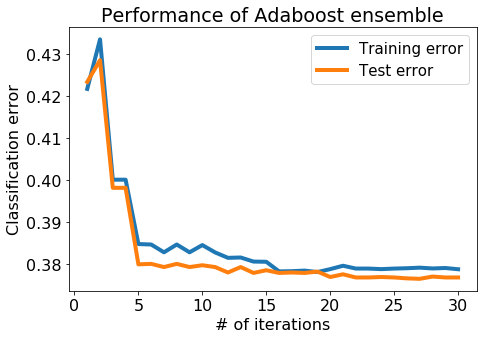

In [216]:
plt.rcParams['figure.figsize'] = 7, 5
plt.plot(range(1,31), error_all, '-', linewidth=4.0, label='Training error')
plt.plot(range(1,31), error_test_all, '-', linewidth=4.0, label='Test error')

plt.title('Performance of Adaboost ensemble')
plt.xlabel('# of iterations')
plt.ylabel('Classification error')
plt.rcParams.update({'font.size': 16})
plt.legend(loc='best', prop={'size':15})
plt.tight_layout()

### Quiz Question: From this plot (with 30 trees), is there massive overfitting as the # of iterations increases?

No